# 원리

* 특성 공간의 밀집 지역을 찾음
* 한 데이터 포인트에서 `eps` 거리 안에 있는 데이터가 `min_samples` 개수만큼 들어 있으면 핵심 샘플로 분류
* 핵심 샘플의 이웃은 동일한 클러스터로 합쳐짐
* `eps`거리 안에 데이터가 `min_samples` 미만이고 핵심 샘플이 이웃에 없으면 노이즈로 분류


## 장단점

* 클러스터의 개수를 미리 지정할 필요가 없고 복잡한 형상도 찾을 수 있으나 다소 느리고 새로운 데이터에 적용할 수 없음

# 코드

In [1]:
from ml1.preamble import*
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)
dbscan= DBSCAN()
clusters = dbscan.fit_predict(X)
print('클러스터 레이블 :\n', clusters)

클러스터 레이블 :
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


=> eps와 min_samples의 기본값이 적절하지 않아 모든 샘플이 노이즈로 분류됨

min_samples: 2 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  클러스터: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]


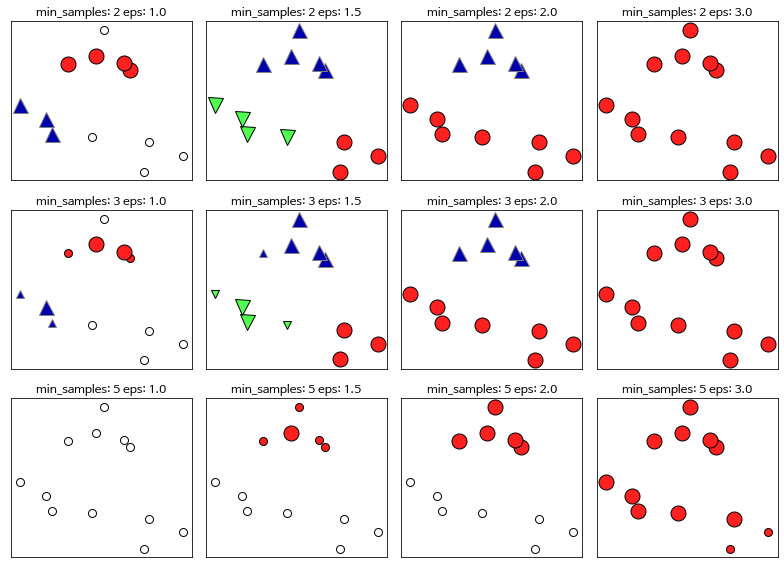

In [2]:
mglearn.plots.plot_dbscan()

=> DBSCAN은 매개변수의 영향을 크게 받음. 적절한 eps값을 쉽게 찾으려면 scaler로 특성의 스케일을 조정하는것이 좋음

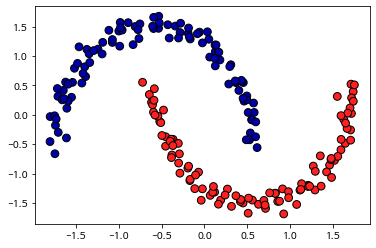

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='k')